In [4]:
!pip install pytube

In [0]:
from pytube import YouTube
import math
import os
from random import sample, randint, shuffle
import shutil
import numpy as np
import pandas as pd

# image operation
import cv2
from PIL import Image
import seaborn as sns

# plots
import matplotlib.pyplot as plt
%matplotlib inline

# Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications import inception_v3 as inc_net

# sci-kit learn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
def scrape_frames(video_name, dest_path, n_images, skip_seconds):
  vidcap = cv2.VideoCapture(video_name)
  total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
  fps = int(vidcap.get(cv2.CAP_PROP_FPS))
  every_x_frame = math.floor((total_frames - skip_seconds * fps) / n_images) - 1
  
  success, image = vidcap.read()
  frame_count = 0
  img_count = 0
  
  while success :
    success, image = vidcap.read()
    
    if frame_count > (skip_seconds * 30) :
      if not success :
        break
        
      if (frame_count % every_x_frame == 0):
        cv2.imwrite(dest_path + "_" + str(img_count) + '.jpg', image)
        img_count += 1
        if (round(img_count / n_images, 2) * 100 % 10 ==0 ):
          print('Completed : ', round(img_count / n_images, 2), " done. ", end="\r")
          
      if img_count == n_images:
        break
        
    frame_count += 1

In [0]:
def move_random_files(path_from, path_to, n):
  files = os.listdir(path_from)
  files.sort()
  files = files[1:]
  
  for i in sample(range(0, len(files)-1), n):
    f = files[i]
    src = path_from + f
    dst = path_to + f
    shutil.move(src, dst)

In [0]:
def preview_random_image(path):
  files = os.listdir(path)
  files.sort()
  img_name = files[randint(1, len(files)-1)]
  img_preview_name = path + img_name
  image = Image.open(img_preview_name)
  plt.imshow(image)
  plt.title(img_name)
  plt.show()
  width, height = image.size
  print('Dimension : ', image.size, "Total : ", width * height)

In [0]:
# transforming images into format supported by CNN
def transform_image(path, size):
  x = load_img(path, target_size = (size[0], size[1]))
  x = img_to_array(x) / 255
  x = np.expand_dims(x, axis=0)
  return (x)

In [0]:
def pretty_cm(y_pred, y_truth, labels):
  cm = metrics.confusion_matrix(y_truth, y_pred)
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True, cmap='BuGn_r')
  
  # lables, title and ticks
  ax.set_xlabel('Predicted label')
  ax.set_ylabel('Actual label')
  ax.set_title('Accuracy : {0}'.format(metrics.accuracy_score(y_truth, y_pred)), size = 15)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [0]:
# Get correctly and incorrectly classified indices
def evaluation_indices(y_pred, y_test):
  index = 0
  correctly_classified_indices = []
  misclassified_indices = []
  for label, predict in zip(y_test, y_pred):
    if label != predict:
      misclassified_indices.append(index)
    else :
      correctly_classified_indices.append(index)
    index += 1
  return (correctly_classified_indices, misclassified_indices)

In [0]:
# function for loading, resizing, and converting an aimage to greyscale
# used for Logistic regression
def img_to_1d_greyscale(img_path, size):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, size)
  return (pd.Series(img.flatten()))

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
parent_path = '/content/drive/My Drive/LEARN/Image Classification/MarioVsWario/'

## DOWNLOAD VIDEO

**Mario**

In [0]:
mario_video = YouTube('https://www.youtube.com/watch?v=lXMJt5PP3kM')

In [8]:
print('Title ; ', mario_video.title, '---')

Title ;  Game Boy Longplay [005] Super Mario Land 2: 6 Golden Coins ---


In [10]:
stream = mario_video.streams.filter(file_extension="mp4").all()
for i in stream:
  print(i)

<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2">
<Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400b">
<Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400b">
<Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2">


In [23]:
mario_video.streams.get_by_itag(18).download(parent_path + 'Videos')

'/content/drive/My Drive/LEARN/Image Classification/MarioVsWario/Videos/Game Boy Longplay [005] Super Mario Land 2 6 Golden Coins.mp4'

**Wario**

In [48]:
wario_video = YouTube('https://www.youtube.com/watch?v=ZJuxdR0KH-s')
print('Title : ', wario_video.title)
stream = wario_video.streams.filter(file_extension='mp4').all()
for i in stream:
  print(i)

Title :  Game Boy Longplay [004] Super Mario Land 3: Wario Land
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2">
<Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400d">
<Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400b">
<Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2">


In [49]:
wario_video.streams.get_by_itag(18).download(parent_path+'Videos')

'/content/drive/My Drive/LEARN/Image Classification/MarioVsWario/Videos/Game Boy Longplay [004] Super Mario Land 3 Wario Land.mp4'

## Geting Images From Videos

In [0]:
mario_video_path = parent_path + '/Videos/Game Boy Longplay [005] Super Mario Land 2 6 Golden Coins.mp4'
scrape_frames(mario_video_path, 
             parent_path + 'training_data/mario/mario',
             n_images = 5000, 
             skip_seconds = 60)

In [50]:
wario_video_path = parent_path + 'Videos/Game Boy Longplay [004] Super Mario Land 3 Wario Land.mp4'
scrape_frames(wario_video_path,
             parent_path + 'training_data/wario/wario',
             n_images = 5000,
             skip_seconds = 60)

## DATA PREPROCESSING

**Splitting data into training and test sets**

In [0]:
move_random_files(path_from = parent_path + 'training_data/mario/',
                 path_to = parent_path + 'test_data/mario/',
                 n = 1000)

In [0]:
move_random_files(path_from = parent_path + 'training_data/wario/',
                 path_to = parent_path + 'test_data/wario/',
                 n = 1000)

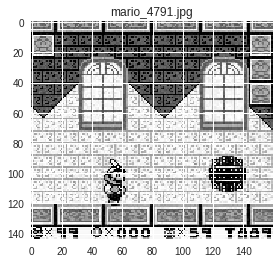

Dimension :  (160, 144) Total :  23040


In [70]:
preview_random_image(parent_path + 'training_data/mario/')

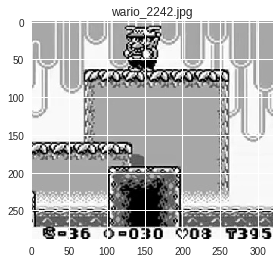

Dimension :  (320, 288) Total :  92160


In [75]:
preview_random_image(parent_path + 'training_data/wario/')

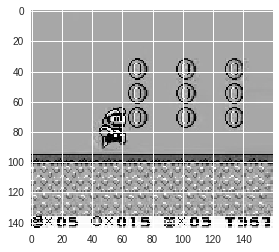

In [77]:
im = cv2.imread(parent_path + 'training_data/mario/mario_1.jpg')
plt.imshow(im)

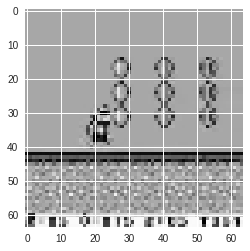

In [78]:
im_cv = cv2.resize(im, (64,64))
plt.imshow(im_cv)

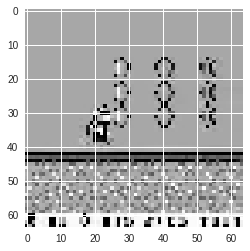

In [81]:
# Using function from Keras
im = load_img(parent_path + 'training_data/mario/mario_1.jpg', target_size=(64,64))
plt.imshow(im)

**Data Augmentation**

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(parent_path + 'training_data',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(parent_path + 'test_data',
                                           target_size = (64,64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [50]:
labels_index = {0 : "mario", 1 : "wario"}
training_set.class_indices

{'mario': 0, 'wario': 1}

**Preview the transformations**

In [0]:
files = os.listdir(parent_path + 'training_data/mario/')
img_name = files[randint(0, len(files) - 1)]

img = load_img(parent_path + 'training_data/mario/' + img_name)

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1,
                               save_to_dir = parent_path + 'preview', save_prefix='mario', save_format='jpeg'):
  i += 1
  if i > 20 :
    break

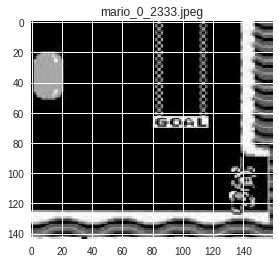

Dimension :  (160, 144) Total :  23040


In [100]:
preview_random_image(parent_path + 'preview/')

## CONVOLUTIONAL NEURAL NETWORK

In [13]:
cnn_classifier = Sequential()

#1st conv layer
cnn_classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
cnn_classifier.add(MaxPooling2D(pool_size = (2,2)))

# 2nd conv layer
cnn_classifier.add(Conv2D(32, (3,3), activation = 'relu')) # no need to specify the input shape
cnn_classifier.add(MaxPooling2D(pool_size = (2,2)))

# 3nd conv layer
cnn_classifier.add(Conv2D(64, (3,3), activation = 'relu'))
cnn_classifier.add(MaxPooling2D(pool_size = (2,2)))

# Flattening
cnn_classifier.add(Flatten())

# Full connection
cnn_classifier.add(Dense(units = 64, activation='relu'))
cnn_classifier.add(Dropout(0.5)) 
cnn_classifier.add(Dense(units = 1, activation='sigmoid'))

cnn_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

**Compiling CNN**

In [0]:
cnn_classifier.compile(optimizer = 'adam',  #adam/rmsprop
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

**Fitting the Model**

In [15]:
cnn_classifier.fit_generator(training_set,
                            steps_per_epoch = 2000,
                            epochs = 10,
                            validation_data = test_set,
                            validation_steps = 2000)

Epoch 1/10
2000/2000 [==============================] - 2885s 1s/step - loss: 0.3714 - acc: 0.8078 - val_loss: 0.1600 - val_acc: 0.9356
Epoch 2/10
2000/2000 [==============================] - 923s 462ms/step - loss: 0.0951 - acc: 0.9654 - val_loss: 0.1022 - val_acc: 0.9646
Epoch 3/10
2000/2000 [==============================] - 927s 463ms/step - loss: 0.0512 - acc: 0.9818 - val_loss: 0.2233 - val_acc: 0.9325
Epoch 4/10
2000/2000 [==============================] - 920s 460ms/step - loss: 0.0388 - acc: 0.9859 - val_loss: 0.1065 - val_acc: 0.9684
Epoch 5/10
2000/2000 [==============================] - 927s 464ms/step - loss: 0.0322 - acc: 0.9885 - val_loss: 0.4879 - val_acc: 0.9162
Epoch 6/10
2000/2000 [==============================] - 924s 462ms/step - loss: 0.0279 - acc: 0.9907 - val_loss: 0.5207 - val_acc: 0.8980
Epoch 7/10
2000/2000 [==============================] - 918s 459ms/step - loss: 0.0282 - acc: 0.9905 - val_loss: 0.3163 - val_acc: 0.9245
Epoch 8/10
2000/2000 [==============

**Save weight and model**

In [0]:
cnn_classifier.save_weights(parent_path + 'mario_vs_wario_weights_dropout.h5')
cnn_classifier.save(parent_path + 'mario_vs_wario_model_dropout.h5')

**Load the model**

In [0]:
cnn_classifier = keras.models.load_model(parent_path + 'mario_vs_wario_model_dropout.h5')

**Evaluating the result**

In [0]:
size = (64,64)
x_eval = list()
y_eval = list()

#mario
files = os.listdir(parent_path + 'test_data/mario')
files.sort()

for i in range(0, len(files) - 1) :
  x_eval.append(transform_image(parent_path + 'test_data/mario/' + files[i + 1], size))
  y_eval.append(0)
  

#wario
files = os.listdir(parent_path + 'test_data/wario')
files.sort()

for i in range(0, len(files) - 1) :
  x_eval.append(transform_image(parent_path + 'test_data/wario/' + files[i + 1], size))
  y_eval.append(1)
  
# stacking the arrays
x_eval = np.vstack(x_eval)

In [0]:
cnn_pred = cnn_classifier.predict_classes(x_eval, batch_size = 32)

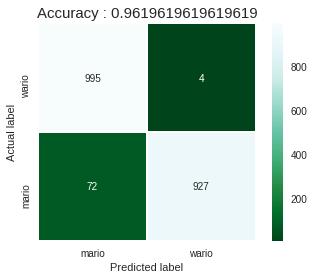

In [55]:
pretty_cm(cnn_pred, y_eval, ['mario', 'wario'])

**Explaining the results with LIME**

In [0]:
correctly_classified_indices, misclassified_indices = evaluation_indices(cnn_pred,  y_eval)

**Correctly classified images**

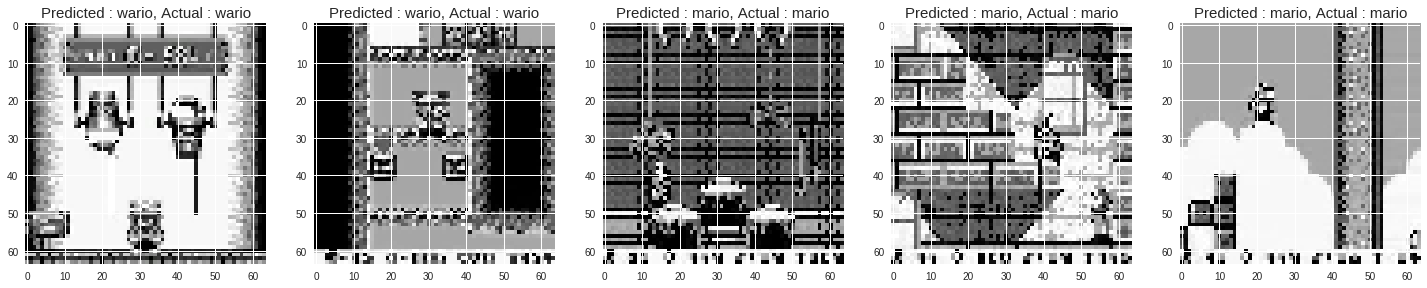

In [49]:
plt.figure(figsize=(25,5))
shuffle(correctly_classified_indices)
for plot_index, good_index in enumerate(correctly_classified_indices[0:5]):
  plt.subplot(1, 5, plot_index + 1)
  plt.imshow(x_eval[good_index])
  plt.title('Predicted : {}, Actual : {}'.format(labels_index[cnn_pred[good_index][0]], 
                                                labels_index[y_eval[good_index]]), fontsize=15)

**Misclassified images**

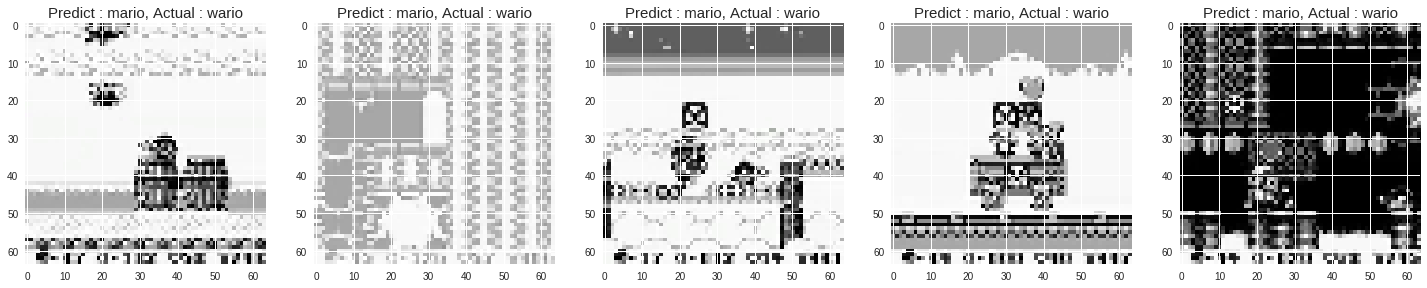

In [53]:
plt.figure(figsize = (25,5))
shuffle(misclassified_indices)
for plot_index, bad_index in enumerate(misclassified_indices[0:5]):
  plt.subplot(1, 5, plot_index + 1)
  plt.imshow(x_eval[bad_index])
  plt.title('Predict : {}, Actual : {}'.format(labels_index[cnn_pred[bad_index][0]],
                                              labels_index[y_eval[bad_index]]), fontsize = 15)

## LOGISTIC REGRESSION

**Preparing the data**

In [0]:
size = (64,64)

# define empty containers
x_train = pd.DataFrame(np.zeros((8000, size[0] * size[1])))
x_test = pd.DataFrame(np.zeros((2000, size[0] * size[1])))
y_train = list()
y_test = list()

In [0]:
# iterating throught files to create training and test set

counter_train = 0
counter_test = 0

# training set....
files = os.listdir(parent_path + 'training_data/mario')
files.sort()

for i in range(0, len(files)):
  x_train.iloc[counter_train, :] = img_to_1d_greyscale(parent_path+'training_data/mario/'+files[i], size) / 255
  y_train.append(0 if 'mario' in files[i] else 1)
  counter_train += 1
  
files = os.listdir(parent_path + 'training_data/wario')
files.sort()

for i in range(0, len(files)):
  x_train.iloc[counter_train, :] = img_to_1d_greyscale(parent_path+'training_data/wario/'+files[i], size) / 255
  y_train.append(0 if 'mario' in files[i] else 1)
  counter_train += 1
  
# test set...

files = os.listdir(parent_path+'test_data/mario')
files.sort()

for i in range(0, len(files)):
  x_test.iloc[counter_test, :] = img_to_1d_greyscale(parent_path+'test_data/mario/'+files[i], size) / 255
  y_test.append(0 if 'mario' in files[i] else 1)
  counter_test += 1
  
files = os.listdir(parent_path+'test_data/wario')
files.sort()

for i in range(0, len(files)):
  x_test.iloc[counter_test, :] = img_to_1d_greyscale(parent_path+'test_data/wario/'+files[i], size) / 255
  y_test.append(0 if 'mario' in files[i] else 1)
  counter_test += 1

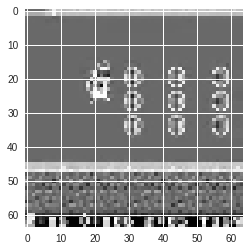

In [95]:
plt.imshow(np.reshape(x_train.iloc[0,].values, size))

### Training the Model

In [0]:
logreg_classifier = LogisticRegression(solver = 'lbfgs')

In [97]:
logreg_classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

**Making predictions**

In [0]:
logreg_pred = logreg_classifier.predict(x_test)


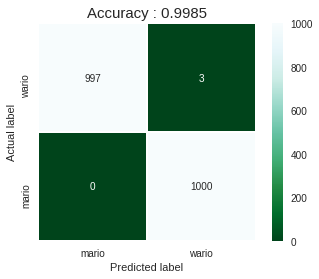

In [101]:
pretty_cm(logreg_pred, y_test, ['mario','wario'])

## Inspecting Results

**misclassified images**

In [0]:
correctly_classified_indices, misclassified_indices = evaluation_indices(logreg_pred, y_test)

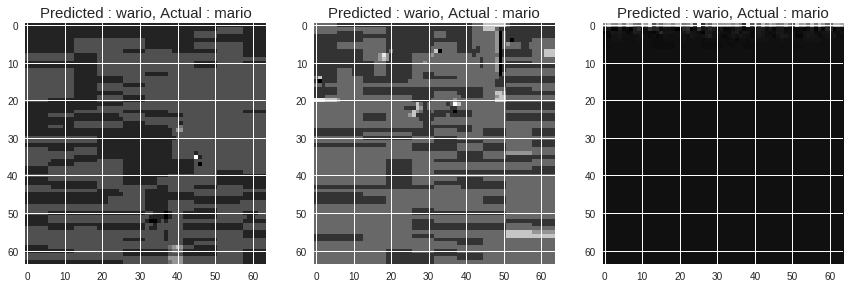

In [103]:
plt.figure(figsize=(25,5))
shuffle(misclassified_indices)

for plot_index, bad_index in enumerate(misclassified_indices[0:5]):
  plt.subplot(1, 5, plot_index+1)
  plt.imshow(np.reshape(x_test.iloc[bad_index, :].values, size))
  plt.title('Predicted : {}, Actual : {}'.format(labels_index[logreg_pred[bad_index]],
                                                labels_index[y_test[bad_index]]), fontsize = 15)

**Correctly classified images**

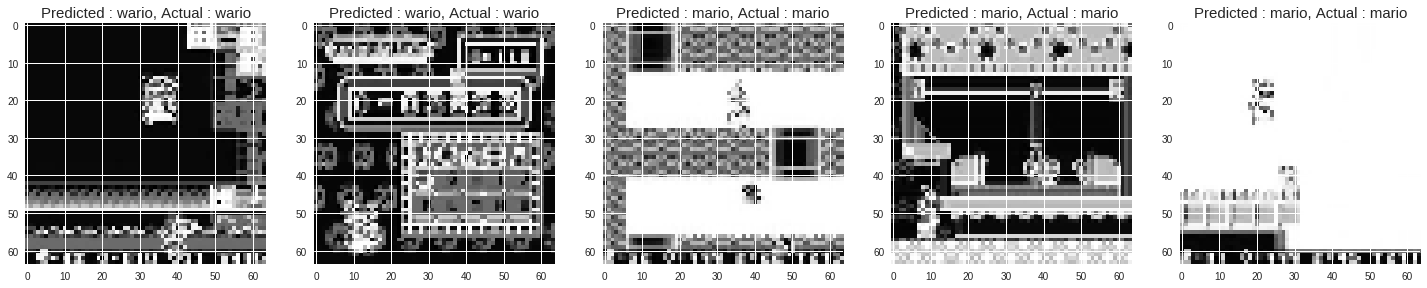

In [104]:
plt.figure(figsize=(25,5))
shuffle(correctly_classified_indices)

for plot_index, good_index in enumerate(correctly_classified_indices[0:5]):
  plt.subplot(1, 5, plot_index+1)
  plt.imshow(np.reshape(x_test.iloc[good_index, :].values, size))
  plt.title('Predicted : {}, Actual : {}'.format(labels_index[logreg_pred[good_index]],
                                                labels_index[y_test[good_index]]), fontsize = 15)